In [1]:
!pip install numpy
!pip install matplotlib
!pip install pandas


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load CSV

- Load the CSV file containing the scores data
- Filter the data to include only the "Foundations of ML" course

In [3]:
df = pd.read_csv('data/raw/scores.csv')
df = df[df['CourseName'] == 'Foundations of ML']
df.head()

,MemberName,EducationLevel,Attendance,TotalHours,AssignmentsCompleted,HackathonParticipation,GitHubScore,PeerReviewScore,CourseName,CapstoneScore
0,Theekshana Rathnayake,3,79.9,43.7,2,0,62.8,5.0,Foundations of ML,45.3
1,Mayura Sandakalum Sellapperuma,2,76.8,95.6,6,0,87.4,2.7,Foundations of ML,78.8
2,Amila Narangoda,3,96.6,75.9,8,0,98.4,2.8,Foundations of ML,65.4
4,Tharusha Vihanga,2,83.2,24.0,6,0,41.8,4.2,Foundations of ML,40.1
7,Chamath Perera,3,86.5,88.0,5,0,23.9,1.3,Foundations of ML,68.2


### Data Exploration

- Load X as 'Attendance' and Y as 'CapstoneScore'
- Plot X vs Y

In [4]:
X = df['Attendance'].values
Y = df['CapstoneScore'].values

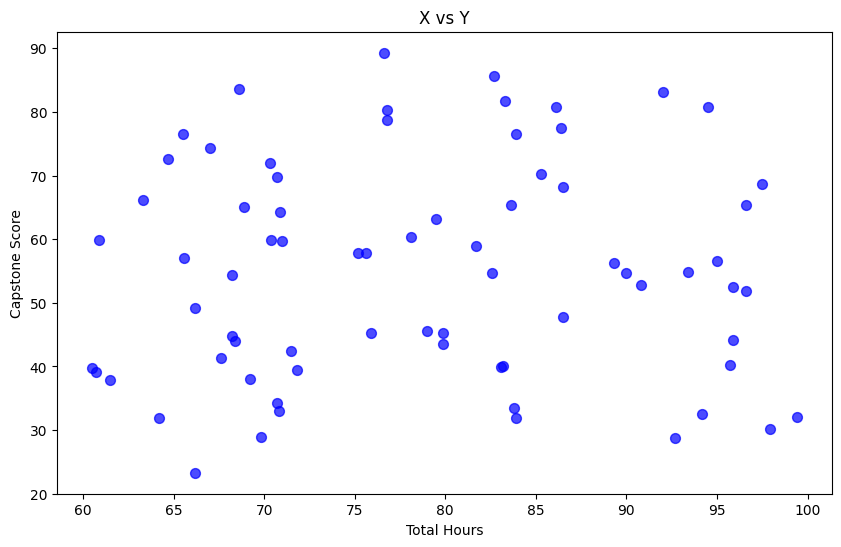

In [5]:
plt.figure(figsize=(10,6))
plt.scatter(X, Y, alpha=0.7, color='blue', s=50)
plt.xlabel('Total Hours')
plt.ylabel('Capstone Score')
plt.title('X vs Y')
plt.show()

### Data Preparation

- Check for missing values

In [6]:
missing_values_attendance = df['Attendance'].isnull().sum()
missing_values_capstone_score = df['CapstoneScore'].isnull().sum()

print(f'Missing values in Attendance: {missing_values_attendance}')
print(f'Missing values in CapstoneScore: {missing_values_capstone_score}')

Missing values in Attendance: 0
Missing values in CapstoneScore: 0


Since there are no missing values, we can proceed with the analysis.

### Util functions

- format_value_for_printing: Format values for better readability

In [7]:
def format_value_for_printing(value):
    if np.isinf(value):
        return "∞"
    elif np.isnan(value):
        return "NaN"
    elif value > 1e6:
        return f"{value:.2e}"
    elif value < 1e6:
        return f"{value:.2e}"
    elif value > 1000:
        return f"{value:.1f}"
    else:
        return f"{value:.4f}"

### Analyzing Functions

- predict: Predict the output
- compute_cost: Calculate the cost function (Mean Squared Error)
- compute_gradients: Calculate partial derivatives for both parameters
- gradient_descent: Implement parameter optimization

In [15]:
# Constants
CONVERGENCE_THRESHOLD = 0.001

In [9]:
def predict(X, beta_0, beta_1):
    return beta_0 + beta_1 * X

def compute_cost(X, Y, beta_0, beta_1):
    m = len(Y)
    y_hat = predict(X, beta_0, beta_1)
    cost = (1 / (2 * m)) * np.sum((y_hat - Y) ** 2)
    return cost

def compute_gradients(X, y, beta_0, beta_1):
    m = len(y)
    y_hat = predict(X, beta_0, beta_1)
    d_beta_0 = (1 / m) * np.sum(y_hat - y)
    d_beta_1 = (1 / m) * np.sum((y_hat - y) * X)
    return d_beta_0, d_beta_1

def gradient_descent(X, y, learning_rate):
    beta_0 = 0.0
    beta_1 = 0.0
    n_iterations = 1000
    cost_history = []
    converged = False

    for i in range(n_iterations):
        cost = compute_cost(X, y, beta_0, beta_1)
        cost_history.append(cost)

        d_beta_0, d_beta_1 = compute_gradients(X, y, beta_0, beta_1)

        beta_0 -= learning_rate * d_beta_0
        beta_1 -= learning_rate * d_beta_1

        if i % 100 == 0:
            print(f"Iteration {i}: Cost - {format_value_for_printing(cost)}")

        # Check for convergence
        if i > 10:
            change = abs(cost_history[-1] - cost_history[-10])
            if change < CONVERGENCE_THRESHOLD:
                print(f"Converged at {i}")
                converged = True
                break

        # Check for non convergence
        if np.isinf(cost):
            print("Cost diverged. Exiting...")
            break

    return beta_0, beta_1, cost_history, converged

### Learning Rate & Convergence

- Check all learning rates
- Check convergence (<0.001)

In [10]:
learning_rates = [0.00001, 0.001, 0.1, 1.0]
results = {}

for lr in learning_rates:
    print(f"Learning Rate: {lr}")
    beta_0, beta_1, cost_history, converged = gradient_descent(X, Y, lr)

    results[lr] = {
        'beta_0': beta_0,
        'beta_1': beta_1,
        'cost_history': cost_history,
        'converged': converged,
        'final_cost': cost_history[-1],
        'iterations': len(cost_history)
    }

Learning Rate: 1e-05
Iteration 0: Cost - 1.66e+03
Iteration 100: Cost - 1.68e+02
Converged at 116
Learning Rate: 0.001
Iteration 0: Cost - 1.66e+03
Iteration 100: Cost - 5.20e+148
Iteration 200: Cost - 1.81e+294
Cost diverged. Exiting...
Learning Rate: 0.1
Iteration 0: Cost - 1.66e+03
Cost diverged. Exiting...
Learning Rate: 1.0
Iteration 0: Cost - 1.66e+03
Cost diverged. Exiting...


/Users/pasang/Desktop/FOML/FOML 1 - Code/.venv/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/2k/mzlqs6js09g3x_x6cqrsjhp40000gn/T/ipykernel_13505/1880694213.py:7: RuntimeWarning: overflow encountered in square
  cost = (1 / (2 * m)) * np.sum((y_hat - Y) ** 2)


### Summary of analysis

In [11]:
print("\n" + "="*80)
print("LEARNING RATE ANALYSIS SUMMARY")
print("="*80)
print(f"{'Learning Rate':<15} {'β₀':<12} {'β₁':<12} {'Final Cost':<12} {'Converged':<10} {'Iterations':<12}")
print("-"*80)

for lr in learning_rates:
    r = results[lr]
    print(f"{lr:<15} {format_value_for_printing(r['beta_0']):<12} {format_value_for_printing(r['beta_1']):<12} {format_value_for_printing(r['final_cost']):<12} {str(r['converged']):<10} {r['iterations']:<12}")


LEARNING RATE ANALYSIS SUMMARY
Learning Rate   β₀           β₁           Final Cost   Converged  Iterations  
--------------------------------------------------------------------------------
1e-05           9.69e-03     6.86e-01     1.68e+02     True       117         
0.001           -5.62e+150   -4.52e+152   ∞            False      210         
0.1             -6.57e+154   -5.28e+156   ∞            False      56          
1.0             6.60e+153    5.31e+155    ∞            False      41          


### Visualize results

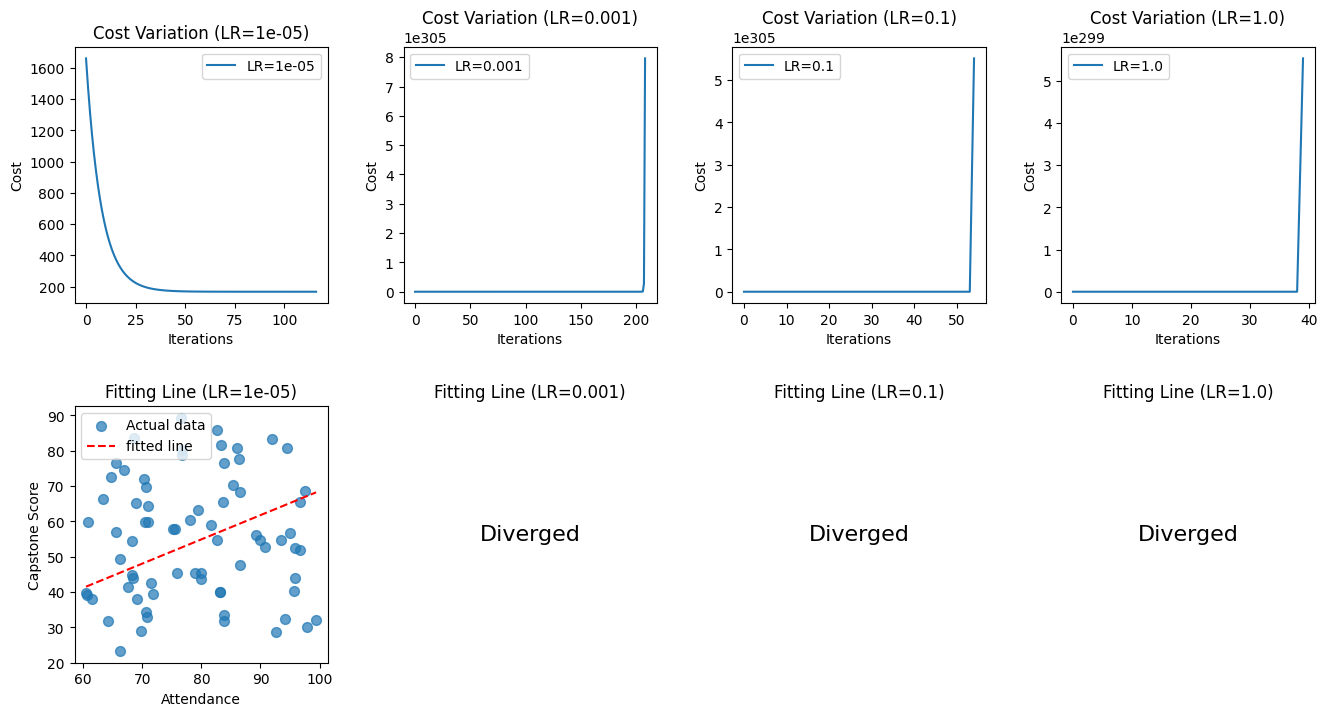

In [12]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

x_min, x_max = float(np.min(X)), float(np.max(X))
x_interval = np.linspace(x_min, x_max, 100)

for row in range(2):
    for col in range(4):
        lr = learning_rates[col]
        if row == 0:
            ax = axes[row, col]
            ax.plot(results[lr]['cost_history'], label=f'LR={lr}')
            ax.set_title(f"Cost Variation (LR={lr})")
            ax.set_xlabel("Iterations")
            ax.set_ylabel("Cost")
            ax.legend()
        else:
            if results[lr]['converged']:
                ax = axes[row, col]
                ax.scatter(X, Y, s=50, alpha=0.7, label="Actual data")

                beta_0 = results[lr]['beta_0']
                beta_1 = results[lr]['beta_1']
                y_hat_interval = beta_0 + beta_1 * x_interval
                ax.plot(x_interval, y_hat_interval, 'r--', label="fitted line")
                ax.set_title(f"Fitting Line (LR={lr})")
                ax.set_xlabel("Attendance")
                ax.set_ylabel("Capstone Score")
                ax.legend()
            else:
                ax = axes[row, col]
                ax.text(0.5, 0.5, "Diverged", fontsize=16, ha='center', va='center')
                ax.set_title(f"Fitting Line (LR={lr})")
                ax.axis('off')

plt.subplots_adjust(
    hspace=0.4,
    wspace=0.3
)
plt.show()

### Evaluation metrics

In [13]:
def calculate_evaluation_metrics(X, Y, beta_0, beta_1):
    y_hat = predict(X, beta_0, beta_1)
    residuals = Y - y_hat
    mse = np.mean(residuals ** 2)
    mae = np.mean(abs(residuals))
    rmse = np.sqrt(mse)
    r_squared = 1 - (np.sum(residuals ** 2) / np.sum((Y - np.mean(Y)) ** 2))

    return mse, mae, rmse, r_squared

In [14]:
print("\n" + "="*70)
print("EVALUATION SUMMARY")
print("="*70)
print(f"{'Learning Rate':<15} {'MSE':<12} {'MAE':<12} {'RMSE':<12} {'R²':<12}")
print("-"*70)

for lr in learning_rates:
    r = results[lr]
    if r['converged']:
        mse, mae, rmse, r_squared = calculate_evaluation_metrics(X, Y, r['beta_0'], r['beta_1'])
        print(f"{lr:<15} {format_value_for_printing(mse):<12} {format_value_for_printing(mae):<12} {format_value_for_printing(rmse):<12} {format_value_for_printing(r_squared):<12}")
    else:
        print(f"{lr:<15} {'Diverged':<12} {'Diverged':<12} {'Diverged':<12} {'Diverged':<12}")


EVALUATION SUMMARY
Learning Rate   MSE          MAE          RMSE         R²          
----------------------------------------------------------------------
1e-05           3.35e+02     1.54e+01     1.83e+01     -1.73e-01   
0.001           Diverged     Diverged     Diverged     Diverged    
0.1             Diverged     Diverged     Diverged     Diverged    
1.0             Diverged     Diverged     Diverged     Diverged    
